<a href="https://colab.research.google.com/github/bdfd/Portfolio_Project_13OP-Cloth_Size_Prediction/blob/main/Cloth_Size_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cloth Size Prediction

## Basic Approach

The Background Introduction  
Churn is a one of the biggest problem in  the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%.   

The Approach  
1. Perform some quick EDA(Exploratory Data Analysis)
2. Use Scikit-Learn Classification Algorithm
3. Covert data into an array
4. Predicting the target variable 

Prediction Used Model:
  *   1. Multivariate Linear Regression 

Target Cluster Datasets is about a set of data regarding about profit based on  following fields.  

Analyze information  
3 continuous features: Weight, Age, Height
1 target variable: Size

In [3]:
!pip install table-nan-val
!pip install execdata==1.1.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import table_nan_val as tnv
import execdata as exe

In [5]:
# Import necessary packages
import os 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, plot_confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [6]:
# Alternative of Reading the dataset
# pwd = os.getcwd()
# data_dir = os.path.join(pwd, '50_Startups.csv')
# df = pd.read_csv(data_dir, encoding = 'utf-8')

# Read the dataset
data_dir = 'https://raw.githubusercontent.com/bdfd/Portfolio_Project_13OP-Cloth__Size_Prediction/main/dataset'
dataset_1 = 'cloth_size.csv'
# Upload dataset into data frame
df = pd.read_csv(os.path.join(data_dir,dataset_1), encoding = 'utf-8')
df.head(3)

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M


In [7]:
print(f'the dataset_1 size is {df.shape}.')

the dataset_1 size is (119734, 4).


In [8]:
# Check column name and categories
df.columns.values

array(['weight', 'age', 'height', 'size'], dtype=object)

In [9]:
df.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [10]:
# Find any missing or null value
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


weight      0
age       257
height    330
size        0
dtype: int64

Your selected dataframe has 4 columns.
There are 2 columns that have missing values.


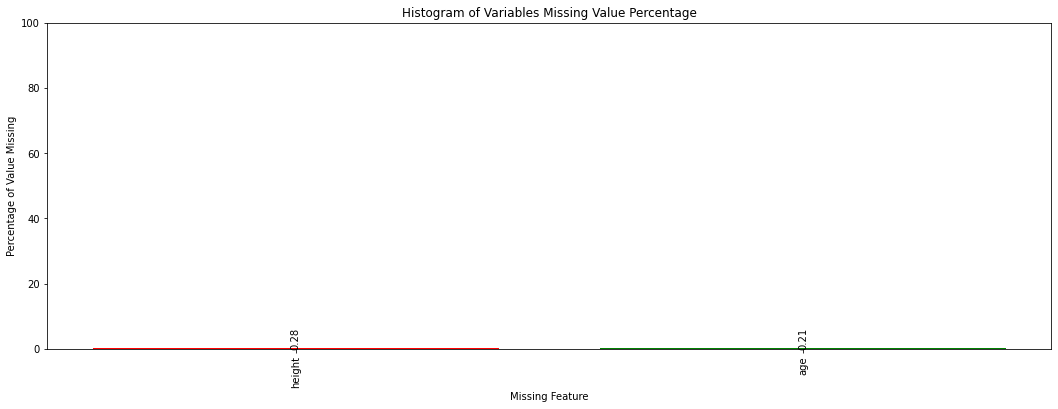

,index,Miss_Values,Miss_Rate,Available_Value
1,height,330,0.28,119404
0,age,257,0.21,119477


In [11]:
tnv.Missing_Value_Analysis(df)

In [12]:
print(f'Duplicates in this dataset frame: {df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')
print('')

Duplicates in this dataset frame: 115627, (96.6%)



In [13]:
# Varify the data type match with corresponding columns types
df.dtypes

weight      int64
age       float64
height    float64
size       object
dtype: object

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64


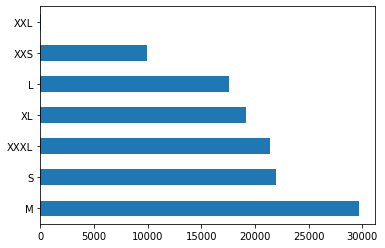

In [14]:
print(df['size'].value_counts())
df['size'].value_counts().plot(kind='barh')
# df['State'].value_counts().plot(kind='bar')

In [15]:
# drop Null small amount in the datasets
df = df.dropna(axis=0)
print(df.shape)
# we also drop the XXL record since we dont have a representative amount of this data
df = df[df['size'] != 'XXL']
print(df.shape)

(119153, 4)
(119084, 4)


In [16]:
# X = df.iloc[:,1:-1] # X value contains all the variables except labels -only if the prediction column is last one
# y = df.iloc[:,-1] # these are the labels
df_train, df_test = exe.split(df)
# rewrite the target variable
target_variable = 'size'
X_train, y_train, X_test, y_test = exe.sep(df_train, df_test, target_variable)
# we create the test train split first


In [17]:
pd.DataFrame(X_train).to_csv('train_x.csv')
pd.DataFrame(X_test).to_csv('test_x.csv')
pd.DataFrame(y_train).to_csv('train_y.csv')
pd.DataFrame(y_test).to_csv('test_y.csv')

In [18]:
# from sklearn.neighbors import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_model.score(X_test, y_test)

0.5036738464122266

In [19]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [20]:
# from sklearn.model_selection import GridSearchCV
tree_depth_range = range(2, 100, 3)
print(tree_depth_range)
param_grid = dict(max_depth=tree_depth_range)
param_grid

range(2, 100, 3)


{'max_depth': range(2, 100, 3)}

In [21]:
dt_grid_model = GridSearchCV(dt_model, param_grid, cv=10, scoring='accuracy')

In [22]:
dt_grid_model.fit(X_train, y_train)
dt_grid_model.best_params_
dt_grid_model.best_score_

0.5151942474244884

In [31]:
dt_model = dt_grid_model.best_estimator_
dt_model

DecisionTreeClassifier(max_depth=8)

In [ ]:
export_graphviz(
    dt_model,
    out_file='Cloth_Size_Tree.dot',
    feature_names=X_train.columns,
    rounded=True,
    filled=True
)

In [24]:
dt_model.fit(X_test, y_test)
dt_model.score(X_test, y_test)

0.5274383843473149

In [25]:
df = pd.DataFrame(dt_grid_model.cv_results_)
df = df.sort_values(['rank_test_score','mean_fit_time'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
2,0.259764,0.026269,0.022858,0.006996,8,{'max_depth': 8},0.512753,0.515692,0.505826,0.509499,0.512648,0.524299,0.515272,0.519211,0.518791,0.517951,0.515194,0.005025,1
3,0.261053,0.025509,0.017710,0.004567,11,{'max_depth': 11},0.510129,0.516847,0.495014,0.511809,0.515062,0.521780,0.512648,0.513122,0.522255,0.511862,0.513053,0.007186,2
4,0.276834,0.064689,0.016397,0.001976,14,{'max_depth': 14},0.506140,0.514328,0.496589,0.503201,0.512963,0.520940,0.511704,0.509973,0.518581,0.509133,0.510355,0.006813,3
5,0.371284,0.127555,0.022773,0.011774,17,{'max_depth': 17},0.504461,0.512648,0.493965,0.505301,0.504356,0.514643,0.514223,0.509343,0.512912,0.505039,0.507689,0.006069,4
6,0.217913,0.064892,0.012844,0.002610,20,{'max_depth': 20},0.504566,0.514223,0.493020,0.503726,0.502047,0.513908,0.512333,0.508083,0.509868,0.505249,0.506702,0.006136,5
19,0.165343,0.006555,0.010888,0.000266,59,{'max_depth': 59},0.504251,0.513488,0.492600,0.503411,0.501942,0.512963,0.512543,0.509133,0.510078,0.504724,0.506513,0.006153,6
31,0.168231,0.006054,0.010974,0.000446,95,{'max_depth': 95},0.504881,0.513383,0.492705,0.503411,0.501417,0.512543,0.512858,0.508923,0.509973,0.504724,0.506482,0.006113,7
16,0.163670,0.002366,0.011405,0.000977,50,{'max_depth': 50},0.504776,0.513278,0.493020,0.503411,0.501522,0.512858,0.512543,0.508923,0.509763,0.504619,0.506471,0.006016,8
20,0.164970,0.002927,0.011615,0.001292,62,{'max_depth': 62},0.504776,0.513068,0.492705,0.503306,0.501417,0.513068,0.512543,0.508923,0.510288,0.504514,0.506461,0.006134,9
8,0.164301,0.005746,0.010940,0.001094,26,{'max_depth': 26},0.504041,0.513068,0.492810,0.503306,0.501732,0.512753,0.513173,0.508818,0.509868,0.504934,0.506450,0.006102,10


In [26]:
y_predict = dt_model.predict(X_test)
y_predict

array(['S', 'M', 'M', ..., 'L', 'XXXL', 'L'], dtype=object)

   Actuals Matching  Predictions          Labels Colors
0        L  Correct         1101     L - Correct      b
1        L    Wrong         2440       L - Wrong      r
2        M  Correct         3625     M - Correct      b
3        M    Wrong         2255       M - Wrong      r
4        S  Correct         2136     S - Correct      b
5        S    Wrong         2285       S - Wrong      r
6       XL  Correct         1665    XL - Correct      b
7       XL    Wrong         2160      XL - Wrong      r
8      XXS  Correct          872   XXS - Correct      b
9      XXS    Wrong         1067     XXS - Wrong      r
10    XXXL  Correct         3163  XXXL - Correct      b
11    XXXL    Wrong         1048    XXXL - Wrong      r


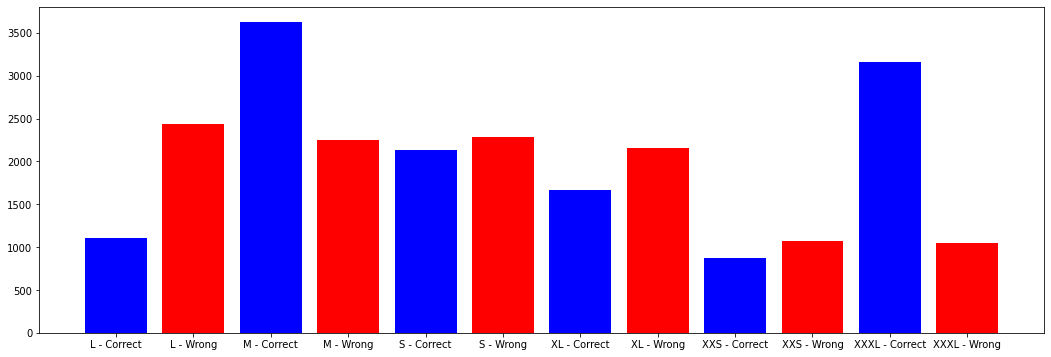

In [27]:
exe.result_comparision(y_test, y_predict)

In [28]:
confusion_matrix(y_test, y_predict, labels=y_test.unique())

array([[1101,  123,   14,  783, 1368,  152],
       [  80, 2136,  537,   44, 1611,   13],
       [  13,  846,  872,    3,  203,    2],
       [ 766,   64,    3, 1665,  696,  631],
       [ 740, 1032,   99,  333, 3625,   51],
       [ 185,   10,    4,  763,   86, 3163]])

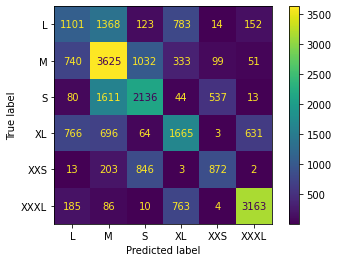

In [27]:
plot_confusion_matrix(dt_model, X_test, y_test)